# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Mikhael Marcelino Pasaribu
- **Email:** marcelino.mikhael345@gmail.com
- **ID Dicoding:** acheron04

## Menentukan Pertanyaan Bisnis

- Musim mana yang memiliki banyak penyewaan sepeda?
- Apakah terdapat kaitan penyewaan sepeda dengan hari kerja atau libur?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#tabel day
day_df= pd.read_csv("https://raw.githubusercontent.com/acheronn-bless/data-bike-sharing/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#tabel hour
hour_df= pd.read_csv("https://raw.githubusercontent.com/acheronn-bless/data-bike-sharing/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [ ]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [ ]:
# cek missing value dari data day_df
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
# cek missing value data hour_df
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
# cek duplikasi
print(day_df.duplicated().sum())
print(hour_df.duplicated().sum())

0
0


In [ ]:
#cek parameter dalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
#cek parameter statistik dalam hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

ubah tipe data dteday menjadi datetime dan beberapa kolom lain menjadi category

hapus kolom instant, workingday, windspeed karena tidak dibutuhkan

ganti nama kolom supaya mudah dipahami

In [ ]:
# hapus kolom yang tidak dibutuhkan
drop_col = ['instant', 'windspeed','workingday']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,82,1518,1600


In [ ]:
# ubah tipe data
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df['season'].astype('category')
day_df['yr'] = day_df['yr'].astype('category')
day_df['mnth'] = day_df['mnth'].astype('category')
day_df['holiday'] = day_df['holiday'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
columns=['season','yr','mnth','holiday','weekday','weathersit']
hour_df[columns] = hour_df[columns].astype('category')

In [ ]:
# ganti nama kolom
day_df.rename(columns={'dteday':'date','cnt':'count', 'mnth':'month','yr':'years','hr':'hours','hum':'humidity'}, inplace=True)
hour_df.rename(columns={'dteday':'date','cnt':'count','mnth':'month','yr':'years','hr':'hours','hum':'humidity'}, inplace=True)

In [ ]:
# ganti nama isi kolom
#menukar season; 1:panas, 2:gugur,3:semi, 4:dingin
day_df.season.replace((1,2,3,4), ('Panas','Gugur','Semi','Dingin'), inplace=True)
hour_df.season.replace((1,2,3,4), ('Panas','Gugur','Semi','Dingin'), inplace=True)
#menukar bulan
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)


<ipython-input-26-fc93a9464bb6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Panas','Gugur','Semi','Dingin'), inplace=True)
<ipython-input-26-fc93a9464bb6>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
day_df.describe(include="all")

,date,season,years,month,holiday,weekday,weathersit,temp,atemp,humidity,casual,registered,count
count,731,731,731.0,731,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,4,2.0,12,2.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Semi,1.0,Jan,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,188,366.0,62,710.0,105.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,3410.000000,6946.000000,8714.000000


In [ ]:

day_df.groupby("season").agg({
    "count": ["sum"]
})

<ipython-input-31-1fd67813f24b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("season").agg({


,count
,sum
season,
Panas,471348
Gugur,918589
Semi,1061129
Dingin,841613


In [ ]:

day_df.groupby("weekday").agg({
    "count": ["sum","mean"]
})



<ipython-input-33-dda74c69658f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby("weekday").agg({


count             
            sum         mean
weekday                     
0        444027  4228.828571
1        455503  4338.123810
2        469109  4510.663462
3        473048  4548.538462
4        485395  4667.259615
5        487790  4690.288462
6        477807  4550.542857

- terlihat bahwa saat musim semi, penyewa sepeda semakin meningkat

- dari data terlihat bahwa penyewa sepeda lebih banyak saat weekday dibanding saat weekend

## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim mana yang memiliki banyak penyewaan sepeda?

<ipython-input-34-5091ad8da0a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( y="count", x="season", data=day_df.sort_values(by="season", ascending=False), palette=colors,ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.p

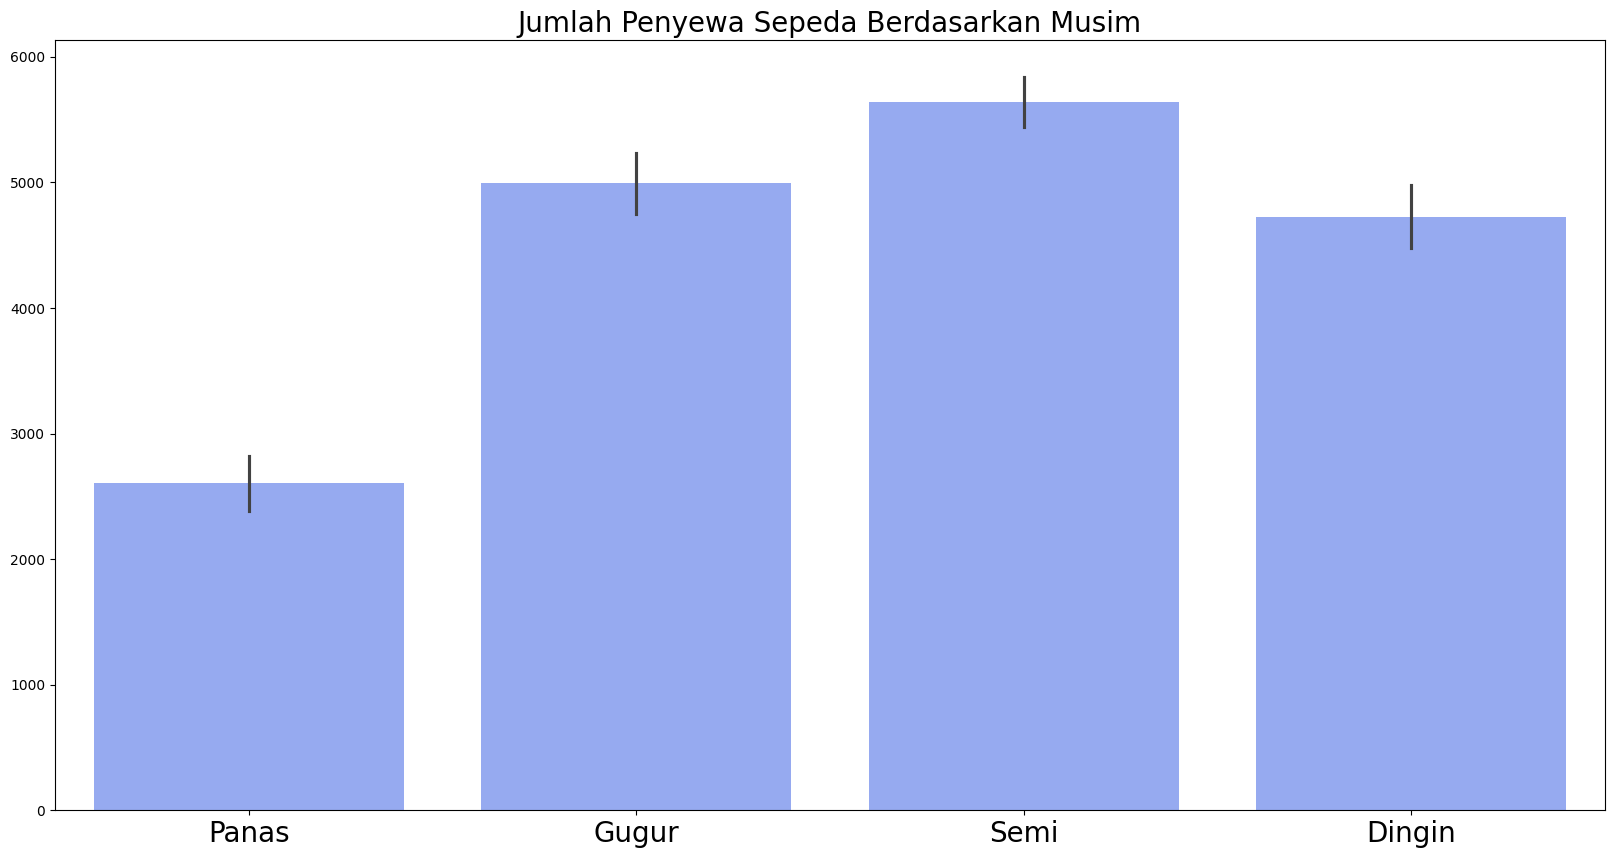

In [ ]:
colors = ["#87A2FF","#87A2FF","#87A2FF","#87A2FF"]
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot( y="count", x="season", data=day_df.sort_values(by="season", ascending=False), palette=colors,ax=ax)
ax.set_title("Jumlah Penyewa Sepeda Berdasarkan Musim", loc="center", fontsize=20)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=10)

plt.show()



**Musim dengan sewa sepeda terbanyak adalah musim semi dengan 1061129 penyewaan**

### Pertanyaan 2: Apakah terdapat kaitan penyewaan sepeda dengan hari kerja atau libur?

<ipython-input-38-be24aed03519>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_day = day_df.groupby(['weekday'])['count'].mean()


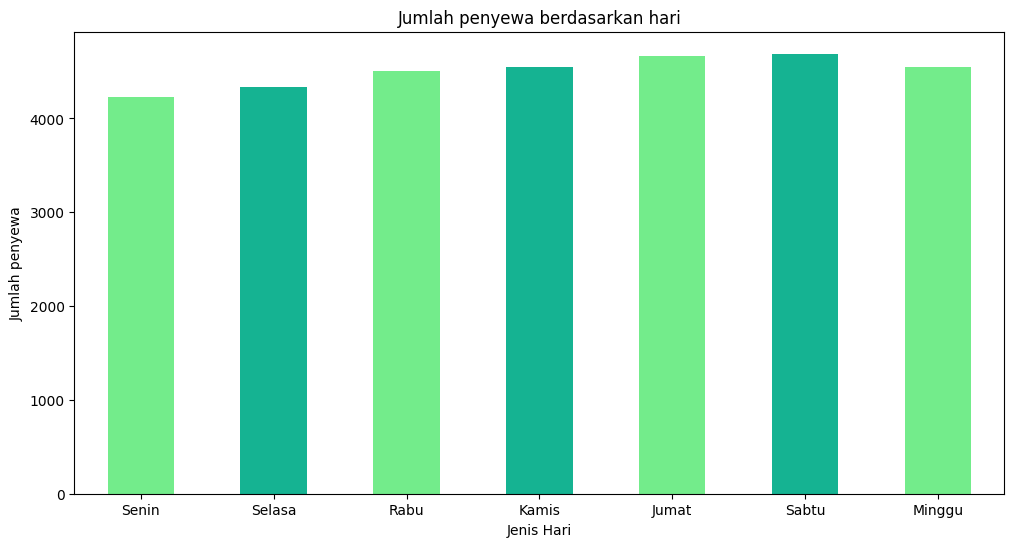

In [ ]:

by_day = day_df.groupby(['weekday'])['count'].mean()

plt.figure(figsize=(12, 6))
by_day.plot(kind='bar', color=['#73EC8B','#15B392'])

plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah penyewa')
plt.title('Jumlah penyewa berdasarkan hari')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu','Kamis', 'Jumat', 'Sabtu','Minggu'], rotation=0)

plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim mana yang memiliki banyak penyewaan sepeda?

Musim yang memiliki banyak penyewaan ialah musim semi dengan 1061129 penyewaan

- Apakah terdapat kaitan penyewaan sepeda dengan hari kerja atau libur?

Iya, grafik menunjukkan bahwa penyewaan sepeda lebih banyak terjadi di weekdays dibandingkan weekend


In [ ]:
day_df.to_csv("days_fixed.csv", index=False)